In [91]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import datetime
import boto3
import psycopg2
import configparser
from sqlalchemy import create_engine
import pyodbc
import seaborn as sn
import matplotlib.pyplot as mp

In [92]:
config = configparser.ConfigParser()
config.read('escproy.cfg')

['escproy.cfg']

In [93]:
RDS_DW_HOST='dw-proy.cjsvaexfxmdn.us-east-1.rds.amazonaws.com'

In [94]:
postgres_driver = f"""postgresql://{config.get('RDS_POST', 'DB_USER')}:{config.get('RDS_POST', 'DB_PASSWORD')}@{RDS_DW_HOST}:{config.get('RDS_POST', 'DB_PORT')}/{config.get('RDS_POST', 'DB_NAME')}"""

In [95]:
sql_query = 'SELECT * FROM fact_table;'
fact_table = pd.read_sql(sql_query, postgres_driver)
fact_table.head(1)

,index,Id. del pedido,Fecha del pedido,Fecha de envío,Id. del cliente,Id. del producto,Ventas,Cantidad,Descuento,Ganancia,id forma envio,id_fecha
0,0,MX-2021-111899,2021-04-02,2021-04-06,AM-11365,MAT-AR-10004857,591.0,3,0.0,206.4,101,202142


In [96]:
sql_query = 'SELECT * FROM dimclientes;'
dimclientes = pd.read_sql(sql_query, postgres_driver)
dimclientes.head(1)

,index,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,País/Región,Región,id gerente,Gerente regional
0,0,AM-11365,Araceli Manzanares,Empresa,Cruzeiro do Sul,Acre,Brasil,Sur,1004,Gabriela Bustamante


In [97]:
sql_query = 'SELECT * FROM dimenvio;'
dimenvio = pd.read_sql(sql_query, postgres_driver)
dimenvio.head(1)

Exception during reset or similar
Traceback (most recent call last):
  File "c:\Users\Andrea\anaconda3\lib\site-packages\sqlalchemy\pool\base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "c:\Users\Andrea\anaconda3\lib\site-packages\sqlalchemy\pool\base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "c:\Users\Andrea\anaconda3\lib\site-packages\sqlalchemy\engine\default.py", line 682, in do_rollback
    dbapi_connection.rollback()
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
sql_query = 'SELECT * FROM dimproducto;'
dimproducto = pd.read_sql(sql_query, postgres_driver)
dimproducto.head(1)

,index,Id. del producto,Categoría,Subcategoría,Nombre del producto
0,0,MAT-AR-10004857,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados"


In [ ]:
Ventas_total = fact_table['Ventas'].sum()
print("Total de ventas:", Ventas_total)

Descuento_Total = fact_table['Descuento'].sum() 
print("Total de descuentos:", Descuento_Total)

Ganancia_Total= fact_table['Ganancia'].sum()
print("Total de ganancia:", Ganancia_Total)

Total de ventas: 21568048.6404
Total de descuentos: 1391.556
Total de ganancia: 2201915.6404


Ventas por clientes

In [ ]:
Vtas_clientes=fact_table.groupby(['Id. del cliente'])['Ventas'].sum()
Vtascliente=pd.DataFrame(Vtas_clientes)
Vtascliente10= Vtascliente.merge(dimclientes,how='inner',on='Id. del cliente')
Vtascliente10

,Id. del cliente,Ventas,index,Nombre del cliente,Segmento,Ciudad,Estado,País/Región,Región,id gerente,Gerente regional
0,AA-10150,25232.0960,2929,Alonso Arévalo,Cliente,Maracaibo,Zulia,Venezuela,Sur,1004,Gabriela Bustamante
1,AA-10165,6664.2000,3123,Adán Atencio,Cliente,Cienfuegos,Cienfuegos,Cuba,Caribe,1001,Eva Lara
2,AA-10225,10329.4000,629,Alejandra Alcaraz,Empresa,Presidencia Roque Sáenz Peña,Chaco,Argentina,Sur,1004,Gabriela Bustamante
3,AA-10390,19210.2256,1262,Arturo Anguiano,Cliente,Grajaú,Maranhão,Brasil,Sur,1004,Gabriela Bustamante
4,AA-10555,11255.0844,5498,Alina Armijo,Empresa,Mixco,Guatemala,Guatemala,Centro,1002,Silvia Pérez
...,...,...,...,...,...,...,...,...,...,...,...
789,ÉC-14365,133274.8752,6049,Érica Casas,Empresa,Managua,Managua,Nicaragua,Centro,1002,Silvia Pérez
790,ÍL-16330,5634.0040,3786,Íñigo Leal,Empresa,Bridgetown,San Miguel,Barbados,Caribe,1001,Eva Lara
791,ÓA-19735,16226.0000,2915,Óscar Alba,Cliente,Valparaíso,Valparaíso,Chile,Sur,1004,Gabriela Bustamante
792,ÓA-19750,15614.5716,915,Óscar Armendáriz,Cliente,Caracas,Distrito Capital,Venezuela,Sur,1004,Gabriela Bustamante


Ventas por segmento

<AxesSubplot:title={'center':'Ventas por Segmento'}, xlabel='Segmento'>

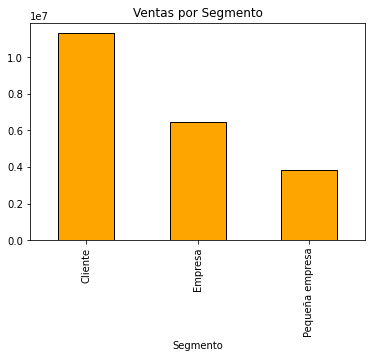

In [ ]:
Vtas_Sector=Vtascliente10.groupby(['Segmento'])['Ventas'].sum().plot(kind='bar',
                                                       title='Ventas por Segmento',                                                       
                                                       color = 'orange',
                                                       edgecolor ='black')
Vtas_Sector

Ventas por Región

In [ ]:
Ganan_clientes=fact_table.groupby(['Id. del cliente'])['Ganancia'].sum()
Ganan_clientes1=pd.DataFrame(Ganan_clientes)
Ganan_clientes10= Ganan_clientes1.merge(dimclientes,how='inner',on='Id. del cliente')

<AxesSubplot:title={'center':'Ventas por Segmento'}, xlabel='Región'>

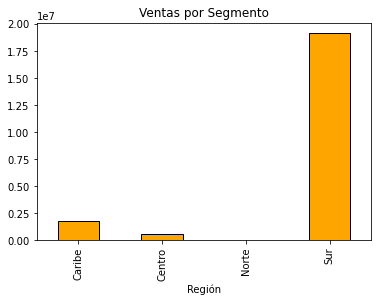

In [ ]:
Vtas_Region=Vtascliente10.groupby(['Región'])['Ventas'].sum().plot(kind='bar',
                                                       title='Ventas por Segmento',                                                       
                                                       color = 'orange',
                                                       edgecolor ='black')
Vtas_Region

<AxesSubplot:title={'center':'Ventas por Segmento'}, xlabel='Región'>

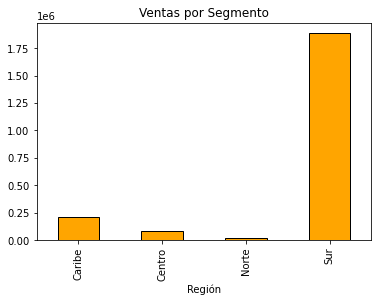

In [ ]:
Ganancia_Region=Ganan_clientes10.groupby(['Región'])['Ganancia'].sum().plot(kind='bar',
                                                       title='Ventas por Segmento',                                                       
                                                       color = 'orange',
                                                       edgecolor ='black')
Ganancia_Region

Ganacia por producto

In [ ]:
VtasProd=fact_table.groupby(['Id. del producto'])['Ventas'].sum()

vtasProd=pd.DataFrame(VtasProd)
vtasProd

,Ventas
Id. del producto,
MAT-AL-10000097,1728.00
MAT-AL-10000128,1515.48
MAT-AL-10000280,735.84
MAT-AL-10000301,2362.80
MAT-AL-10000417,2643.00
...,...
TEC-TE-10004755,24515.68
TEC-TE-10004798,48047.04
TEC-TE-10004863,6543.08


In [ ]:
Vtas_prod=vtasProd.merge(dimproducto,how='inner',on='Id. del producto')
Vtas_prod

,Id. del producto,Ventas,index,Categoría,Subcategoría,Nombre del producto
0,MAT-AL-10000097,1728.00,4476,Material de oficina,Almacenamiento,"Smead Caja, Tamaño completo"
1,MAT-AL-10000128,1515.48,446,Material de oficina,Almacenamiento,"Tenex Caja, Metal"
2,MAT-AL-10000280,735.84,433,Material de oficina,Almacenamiento,"Fellowes Caja, Tamaño completo"
3,MAT-AL-10000301,2362.80,786,Material de oficina,Almacenamiento,"Eldon Caja, Industrial"
4,MAT-AL-10000417,2643.00,5034,Material de oficina,Almacenamiento,"Fellowes Carpetas, Tamaño completo"
...,...,...,...,...,...,...
2181,TEC-TE-10004755,24515.68,2190,Tecnología,Teléfonos,"Motorola Base de audio, Al por mayor"
2182,TEC-TE-10004798,48047.04,517,Tecnología,Teléfonos,"Nokia Base de audio, Al por mayor"
2183,TEC-TE-10004863,6543.08,1230,Tecnología,Teléfonos,"Motorola Teléfono inteligente, Tamaños variados"
2184,TEC-TE-10004900,13668.00,895,Tecnología,Teléfonos,"Samsung Amplificador de señal, Al por mayor"


In [99]:
Vtas_Productos=Vtas_prod.groupby(['Nombre del producto'])['Ventas'].sum()
Vtas_Productos

Nombre del producto
Acco Anillas, Duradero           1294.72
Acco Anillas, Económico          1065.60
Acco Anillas, Reciclado           982.80
Acco Anillas, Transparente        979.20
Acco Carpeta, Duradero           4750.80
                                  ...   
Xerox Recordadores, Reciclado    1774.08
Xerox Resma, Multicolor          3441.00
Xerox Resma, Paquete de 12       6705.60
Xerox Resma, Premium             3195.92
Xerox Resma, Reciclado            630.00
Name: Ventas, Length: 1882, dtype: float64

Venta por categoria

<AxesSubplot:title={'center':'Ventas por Segmento'}, xlabel='Categoría'>

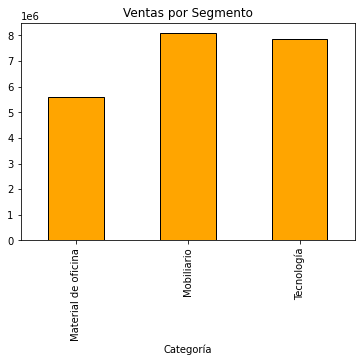

In [102]:
Vtas_categoria=Vtas_prod.groupby(['Categoría'])['Ventas'].sum().plot(kind='bar',
                                                       title='Ventas por Segmento',                                                       
                                                       color = 'orange',
                                                       edgecolor ='black')
Vtas_categoria